In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir(r'/content/drive/My Drive/ECE1512/P1')

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Flatten
from keras import regularizers
import keras.backend as K
from keras.models import load_model
from tensorflow.core.util import event_pb2
from tensorflow.python.lib.io import tf_record
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import cv2

In [ ]:
train_dir = '/content/drive/My Drive/ECE1512/P1/hmt_dataset/HMT_train'
test_dir = '/content/drive/My Drive/ECE1512/P1/hmt_dataset/HMT_test'

test_datagen = ImageDataGenerator(rescale=1/255.)

# try to make to only one batch (total image found 496)
test_generator = test_datagen.flow_from_directory(test_dir,
class_mode='categorical',
interpolation='bilinear',
target_size=(224, 224),
batch_size=496,
shuffle=False)

Found 496 images belonging to 8 classes.


In [ ]:
HMT_model_path = '/content/drive/My Drive/ECE1512/P1/models/HMT.h5'
model=load_model(HMT_model_path)
test_generator.reset()
image_batch,label_batch=test_generator.next()
print("image_batch dim: {}, label_batch dim: {}".format(image_batch.shape, label_batch.shape))
classes=['Tumor', 'Stroma', 'Complex', 'Lympho', 'Debris', 'Mucosa', 'Adiopse', 'Empty']

image_batch dim: (496, 224, 224, 3), label_batch dim: (496, 8)


In [ ]:
prediction=model(image_batch)
index = int(np.floor(np.random.rand()*496))
print('True label: '+classes[np.argmax(label_batch[index])])
print('Predicted_label: '+classes[np.argmax(prediction[index])])
print('Confidence score for the correct label: '+str(prediction[index][np.argmax(label_batch[index])].numpy()))

True label: Adiopse
Predicted_label: Adiopse
Confidence score for the correct label: 0.95390207


In [ ]:
#Task3.1.a
hmt_pred = np.argmax(prediction, axis=1)
hmt_label = np.argmax(label_batch, axis=1)
print("Overall accuracy: {}".
      format(np.mean(hmt_pred == hmt_label)))

Overall accuracy: 0.8346774193548387


HMT class 0 with size 62 score: 0.855
HMT class 1 with size 62 score: 0.758
HMT class 2 with size 62 score: 0.774
HMT class 3 with size 62 score: 0.855
HMT class 4 with size 62 score: 0.661
HMT class 5 with size 62 score: 0.823
HMT class 6 with size 62 score: 0.952
HMT class 7 with size 62 score: 1.000


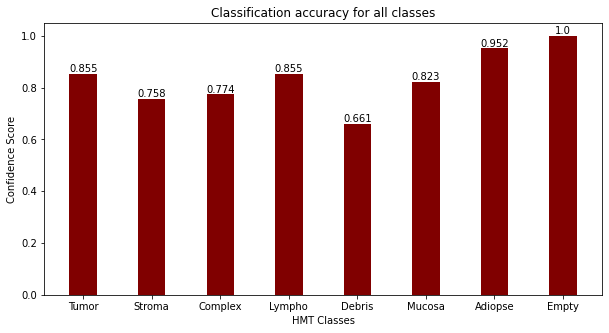

In [ ]:
#Task3.1.b
hmt_class_accuracy_list = []

for hmt_class in range(8):
  hmt_class_index = np.where(hmt_label == hmt_class)
  hmt_class_size = hmt_class_index[0].size
  x_test_class = image_batch[hmt_class_index]
  __predict = np.argmax(model(x_test_class), axis=1)
  __acc = np.where(__predict == hmt_class)[0].size / hmt_class_size
  hmt_class_accuracy_list.append(__acc)
  print("HMT class {} with size {} score: {:.3f}".format(hmt_class, hmt_class_size, __acc))


fig, ax = plt.subplots(figsize=(10,5))
bar_plot = plt.bar(classes, hmt_class_accuracy_list, color ='maroon', width = 0.4)
def autolabel(rects):
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                str(round(hmt_class_accuracy_list[idx],3)),
                ha='center', va='bottom', rotation=0)
plt.xlabel("HMT Classes") 
plt.ylabel("Confidence Score") 
plt.title("Classification accuracy for all classes")
autolabel(bar_plot)
plt.show()

In [ ]:
!pip install scikit-plot

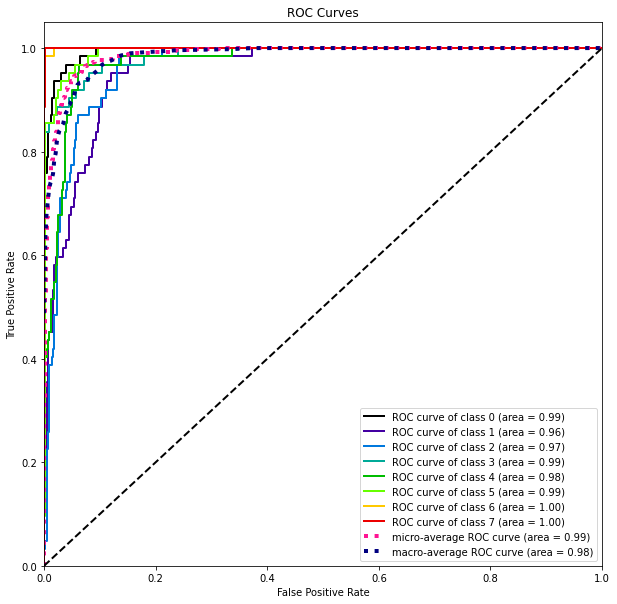

In [ ]:
# Task3.1.c: ROC and AUC for each class
import scikitplot as skplt
skplt.metrics.plot_roc(hmt_label, prediction, figsize=(10,10))
plt.show()

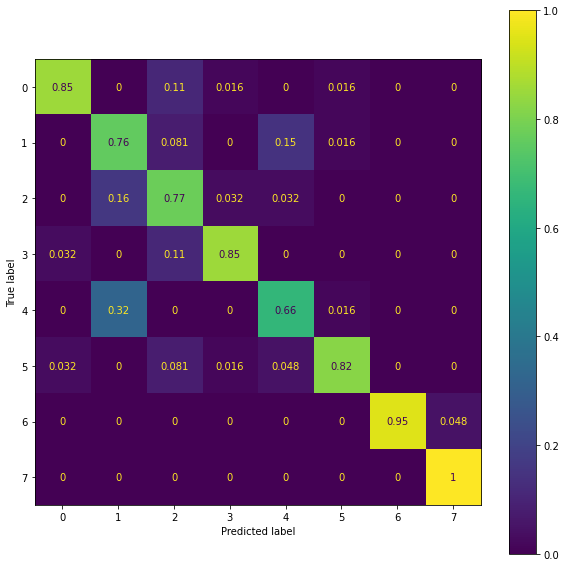

In [ ]:
# Task3.1.d: Normalized confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix_labels = [0,1,2,3,4,5,6,7]
cm = confusion_matrix(hmt_label, hmt_pred, labels=confusion_matrix_labels, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=confusion_matrix_labels)
disp.plot()
disp.figure_.set_figheight(10)
disp.figure_.set_figwidth(10)

HMT class Tumor F1 score: 0.8907563025210085
HMT class Stroma F1 score: 0.6762589928057554
HMT class Complex F1 score: 0.7164179104477612
HMT class Lympho F1 score: 0.8907563025210085
HMT class Debris F1 score: 0.7008547008547009
HMT class Mucosa F1 score: 0.8793103448275862
HMT class Adiopse F1 score: 0.9752066115702479
HMT class Empty F1 score: 0.9763779527559054


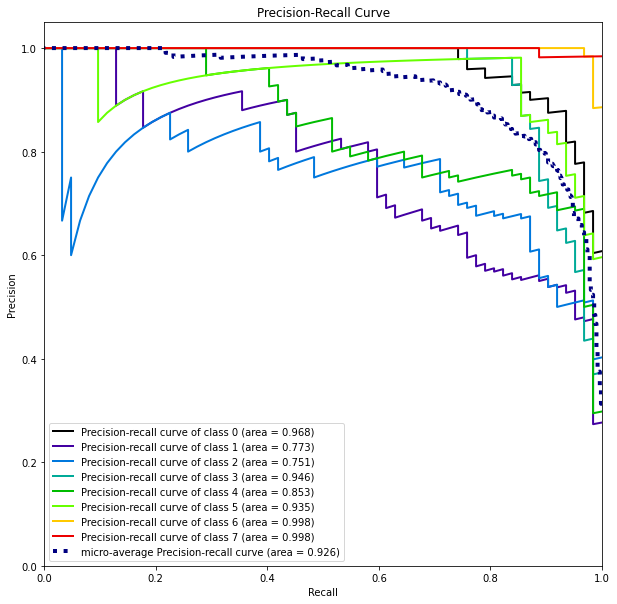

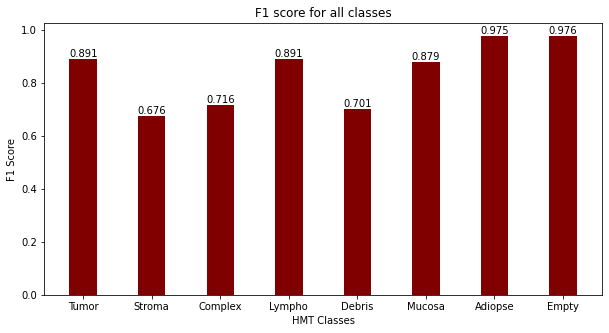

In [ ]:
# Task3.1.e: Precision, Recall, and F1 score
from sklearn.metrics import precision_recall_fscore_support as f1_score
f1_plot = []
_precision, _recall, fscore, _support = f1_score(hmt_label, hmt_pred)
for iter in range(fscore.shape[0]):
  f1_plot.append(fscore[iter])
  print("HMT class {} F1 score: {}".format(classes[iter], fscore[iter]))

skplt.metrics.plot_precision_recall(hmt_label, prediction, figsize=(10,10))
plt.show()



fig, ax = plt.subplots(figsize=(10,5))
bar_plot = plt.bar(classes, f1_plot, color ='maroon', width = 0.4)
def autolabel(rects):
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                str(round(f1_plot[idx],3)),
                ha='center', va='bottom', rotation=0)
plt.xlabel("HMT Classes") 
plt.ylabel("F1 Score") 
plt.title("F1 score for all classes")
autolabel(bar_plot)
plt.show()

In [ ]:
from xai_utils import *

In [ ]:
index = int(np.floor(np.random.rand()*496))
print(index)
print('True label: '+classes[np.argmax(label_batch[index])])
print('Predicted_label: '+classes[np.argmax(prediction[index])])
print('Confidence score for the correct label: '+str(prediction[index][np.argmax(label_batch[index])].numpy()))


400
True label: Adiopse
Predicted_label: Adiopse
Confidence score for the correct label: 0.9864978


In [ ]:
explanation_map_SISE = SISE(np.expand_dims(image_batch[index], axis=0), model, layers=[['conv2d_3']], class_index=np.argmax(prediction[index]), grad_thr=0.)
print(explanation_map_SISE.min(), explanation_map_SISE.max())
print(explanation_map_SISE.shape)
explanation_map_SISE -= explanation_map_SISE.min()
explanation_map_SISE /= explanation_map_SISE.max()+10e-30


0.0 1.0
(224, 224)


Text(0.5, 1.0, 'Sample image')

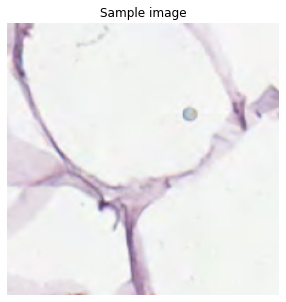

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.imshow(image_batch[index])
plt.axis('off')
plt.title('Sample image')

plt.subplot(1,2,2)
plt.imshow(image_batch[index])
plt.imshow(explanation_map_SISE, cmap='jet', alpha=0.5)
plt.axis('off')
plt.title('Explanation map (SISE)')

In [ ]:
def calculate_drop_increase(images, model, exmap, class_index, frac=0.15, shap=False):
    predictions = model.predict(images)
    # Pre-processing image 
    img=images[0,:,:,:]
    img=img_to_array(img)
    img = np.expand_dims(img,axis=0)
    # Getting the prediction for image
    Y=predictions[0][class_index]
    
    grad_array=np.reshape(exmap, (-1,))
    array_size=int(grad_array.shape[0]*frac)
    thr=np.flip(sorted(grad_array))[array_size]
    exmap1_msk=(exmap>thr)
    exmap1_thr=np.zeros(shape=(1,224,224,3))
    if shap:
      exmap1_thr[0,:,:,:]=img[0,:,:,:]*exmap1_msk
    else:
      exmap1_thr[0,:,:,0]=img[0,:,:,0]*exmap1_msk
      exmap1_thr[0,:,:,1]=img[0,:,:,1]*exmap1_msk
      exmap1_thr[0,:,:,2]=img[0,:,:,2]*exmap1_msk
    ex_predictions = model.predict(exmap1_thr)[0]
    O1=ex_predictions[class_index]
    etta=(Y-O1)/(Y+1e-100)
    return etta*(etta>0), 1*(etta<0), Y, O1



In [ ]:
drop_rate = 0.
increase_rate = 0
for index in range(496):
    prediction=model(np.expand_dims(image_batch[index], axis=0)).numpy()
    explanation_map = SISE(np.expand_dims(image_batch[index], axis=0), model, layers=[['conv2d_3']], class_index=np.argmax(prediction[0]), grad_thr=0.)
    __drop, __increase, __true, __pred = calculate_drop_increase(np.expand_dims(image_batch[index], axis=0), model, explanation_map, class_index=np.argmax(prediction[0]), frac=0.9)
    drop_rate += __drop
    increase_rate += __increase
drop_rate /= 1000
increase_rate /= 1000
print("drop rate: {}, increase rate: {}".format(drop_rate, increase_rate))

drop rate: 0.30077292825351515, increase rate: 0.086


In [ ]:
explanation_map_shap = np.load('shap_exmp_all.npy')
print("shap explanation map dim on HMT: {}".format(explanation_map_shap.shape))
drop_rate = 0.
increase_rate = 0
for index in range(496):
    prediction=model(np.expand_dims(image_batch[index], axis=0)).numpy()
    explanation_map = explanation_map_shap[index]
    __drop, __increase, __true, __pred = calculate_drop_increase(np.expand_dims(image_batch[index], axis=0), model, explanation_map, class_index=np.argmax(prediction[0]), frac=0.9, shap=True)
    drop_rate += __drop
    increase_rate += __increase
drop_rate /= 1000
increase_rate /= 1000
print("drop rate: {}, increase rate: {}".format(drop_rate, increase_rate))

shap explanation map dim on HMT: (496, 224, 224, 3)
drop rate: 0.4389990241617948, increase rate: 0.057
